In [1]:
# ==============================================================================
# 1. SETUP & LIBRARY IMPORT
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Library Logistic Regression
from sklearn.linear_model import LogisticRegression

# Library Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Konfigurasi Visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Library berhasil di-import. Siap menggunakan Logistic Regression.")

✅ Library berhasil di-import. Siap menggunakan Logistic Regression.


In [2]:
# ==============================================================================
# 2. MEMUAT DATA PREPROCESSED
# ==============================================================================
# Lokasi data relative terhadap notebook ini (Mundur 3 folder)
DATA_PATH = "../../../data/"

try:
    print("📂 Sedang memuat data dari folder 'data/'...")

    # Load Data Latih (X_train & y_train - Sudah Balanced & Scaled)
    X_train = pd.read_csv(DATA_PATH + "X_train_final.csv")
    y_train = pd.read_csv(DATA_PATH + "y_train_final.csv").values.ravel()

    # Load Data Uji (X_test & y_test - Data Murni)
    X_test = pd.read_csv(DATA_PATH + "X_test_final.csv")
    y_test = pd.read_csv(DATA_PATH + "y_test_final.csv").values.ravel()

    # Load Label Encoder
    le = joblib.load(DATA_PATH + "label_encoder.pkl")
    class_names = le.classes_

    print("✅ Data berhasil dimuat!")
    print(f"   - Data Latih : {X_train.shape[0]} baris")
    print(f"   - Data Uji   : {X_test.shape[0]} baris")
    print(f"   - Target Label: {dict(zip(le.classes_, le.transform(le.classes_)))}")

except FileNotFoundError:
    print("❌ Error: File data tidak ditemukan.")

📂 Sedang memuat data dari folder 'data/'...
✅ Data berhasil dimuat!
   - Data Latih : 45080 baris
   - Data Uji   : 5091 baris
   - Target Label: {'Excellent': np.int64(0), 'Fair': np.int64(1), 'Good': np.int64(2), 'Marginal': np.int64(3)}


In [3]:
# ==============================================================================
# 3. PELATIHAN MODEL (LOGISTIC REGRESSION)
# ==============================================================================
print("🔄 Sedang melatih Logistic Regression...")

# Inisialisasi Model
# max_iter=1000 : Memberi kesempatan lebih banyak iterasi agar model konvergen (matang)
# solver='lbfgs': Algoritma standar yang cepat untuk dataset medium
# random_state=42: Biar konsisten
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Proses Fitting
logreg_model.fit(X_train, y_train)

print("✅ Pelatihan Selesai! Model siap dievaluasi.")

🔄 Sedang melatih Logistic Regression...
✅ Pelatihan Selesai! Model siap dievaluasi.


In [4]:
# ==============================================================================
# 4. EVALUASI MODEL
# ==============================================================================
print("📊 Mengevaluasi Logistic Regression pada Data Uji (Test Set)...")

# Prediksi Label
y_pred = logreg_model.predict(X_test)

# A. Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Akurasi (Accuracy): {accuracy * 100:.2f}%")

# B. Laporan Klasifikasi Lengkap
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

📊 Mengevaluasi Logistic Regression pada Data Uji (Test Set)...

🔹 Akurasi (Accuracy): 90.26%

🔹 Classification Report:
              precision    recall  f1-score   support

   Excellent       0.94      0.90      0.92      2818
        Fair       0.72      0.88      0.79        69
        Good       0.87      0.91      0.89      2188
    Marginal       0.80      1.00      0.89        16

    accuracy                           0.90      5091
   macro avg       0.83      0.92      0.87      5091
weighted avg       0.90      0.90      0.90      5091



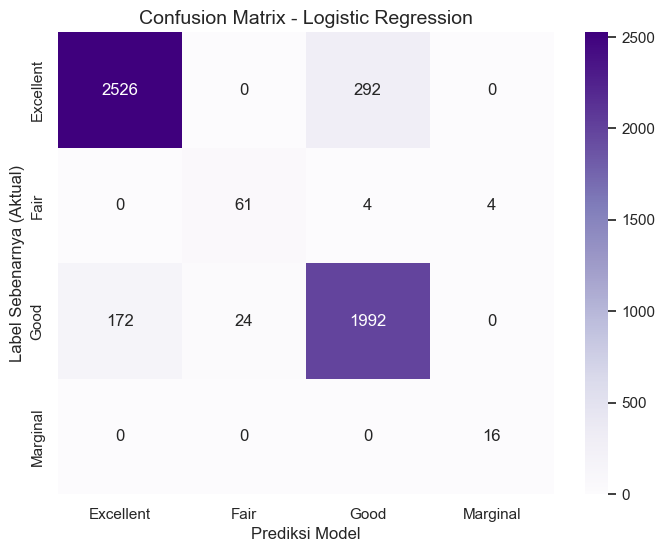

In [6]:
# ==============================================================================
# 5. VISUALISASI CONFUSION MATRIX
# ==============================================================================
plt.figure(figsize=(8, 6))

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap (Pakai warna Ungu 'Purples' biar variatif)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Aktual)', fontsize=12)
plt.show()

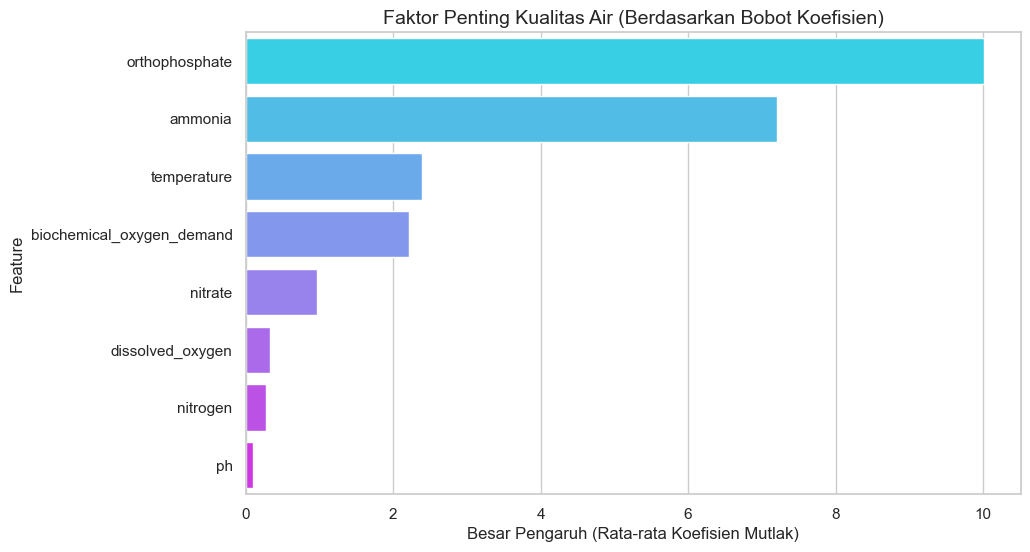

Analisis: Semakin panjang batang, semakin besar pengaruh zat tersebut mengubah keputusan model.


In [8]:
# ==============================================================================
# 6. ANALISIS KOEFISIEN FITUR (FEATURE IMPORTANCE)
# ==============================================================================
# Logistic Regression punya koefisien untuk setiap kelas.
# Kita ambil rata-rata absolutnya untuk melihat pengaruh umum.
importance = np.mean(np.abs(logreg_model.coef_), axis=0)
feature_names = X_train.columns

# Membuat DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='cool', hue='Feature', legend=False)

plt.title('Faktor Penting Kualitas Air (Berdasarkan Bobot Koefisien)', fontsize=14)
plt.xlabel('Besar Pengaruh (Rata-rata Koefisien Mutlak)')
plt.show()

print("Analisis: Semakin panjang batang, semakin besar pengaruh zat tersebut mengubah keputusan model.")

In [10]:
# ==============================================================================
# 7. MENYIMPAN MODEL (EXPORT)
# ==============================================================================
model_filename = 'logreg_model_final.pkl'
joblib.dump(logreg_model, model_filename)

print(f"✅ Model berhasil disimpan sebagai: {model_filename}")

✅ Model berhasil disimpan sebagai: logreg_model_final.pkl
